In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('cars_clus.csv')

In [3]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [4]:
Y = df[['engine_s', 'resale']]
#Y has only two values, engine size and resale
Yz = pd.DataFrame(stats.zscore(Y), columns = ['engine_s', 'resale'])
# this normalizes the data
kmeans01 = KMeans(n_clusters = 2).fit(Yz)
#creating the k-means cluster
labels = kmeans01.labels_
df["labels"] = labels
#adding the k-means labels to our dataframe
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1


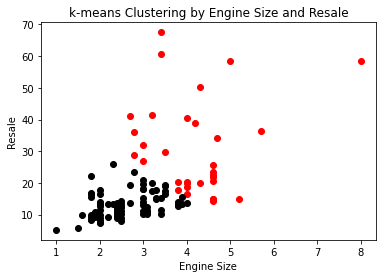

In [5]:
filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
plt.scatter(filtered_label0['engine_s'],filtered_label0['resale'], color = 'red')
plt.scatter(filtered_label1['engine_s'],filtered_label1['resale'], color = 'black')
plt.title('k-means Clustering by Engine Size and Resale') #title
plt.xlabel('Engine Size') #x label
plt.ylabel('Resale') #y label
plt.show()

In [6]:
filtered_label0.describe()


,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0,32.0
mean,58.836250,30.892500,0.250000,42.411875,4.175000,245.656250,110.609375,73.36250,194.731250,3.816250,20.090625,20.962500,2.945687,0.0,0.0
std,109.633449,14.986279,0.439941,16.705646,1.019171,56.355215,10.402430,3.33706,14.725344,0.487837,2.770275,2.648158,1.561584,0.0,0.0
min,0.916000,14.210000,0.000000,19.460000,2.700000,190.000000,92.600000,67.80000,171.000000,2.778000,16.600000,15.000000,-0.088000,0.0,0.0
25%,8.883500,19.916250,0.000000,31.574750,3.475000,208.750000,105.700000,70.72500,181.425000,3.487000,18.500000,19.000000,2.183750,0.0,0.0
50%,17.737000,26.350000,0.000000,38.990000,4.100000,223.000000,111.550000,73.35000,192.950000,3.876000,19.000000,21.500000,2.875500,0.0,0.0
75%,52.534000,39.343750,0.250000,50.357000,4.600000,275.000000,114.625000,75.55000,205.750000,4.000500,21.100000,22.250000,3.955000,0.0,0.0
max,540.561000,67.550000,1.000000,82.600000,8.000000,450.000000,138.700000,79.30000,224.500000,5.115000,26.000000,25.000000,6.293000,0.0,0.0


In [7]:
Y = df[['engine_s', 'resale']]
#Y has only two values, engine size and resale
Yz = pd.DataFrame(stats.zscore(Y), columns = ['engine_s', 'resale'])
# this normalizes the data
kmeans01 = KMeans(n_clusters = 4).fit(Yz)
#creating the k-means cluster
labels = kmeans01.labels_
df["labels"] = labels
#adding the k-means labels to our dataframe
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,3
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,3


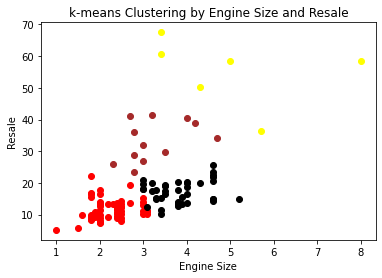

In [8]:
filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
filtered_label3 = df[labels == 3]
plt.scatter(filtered_label0['engine_s'],filtered_label0['resale'], color = 'red')
plt.scatter(filtered_label1['engine_s'],filtered_label1['resale'], color = 'black')
plt.scatter(filtered_label2['engine_s'],filtered_label2['resale'], color = 'yellow')
plt.scatter(filtered_label3['engine_s'],filtered_label3['resale'], color = 'brown')
plt.title('k-means Clustering by Engine Size and Resale') #title
plt.xlabel('Engine Size') #x label
plt.ylabel('Resale') #y label
plt.show()

<h3>I believe that based on the two previous clusters, the four cluster superior since it maximizes the average profile over a wide range of conceivable values.<h3/>

In [9]:
Y = df[['width','length']]
#Y has only two values, engine size and resale
Yz = pd.DataFrame(stats.zscore(Y), columns = ['width','length'])
# this normalizes the data
kmeans01 = KMeans(n_clusters = 4).fit(Yz)
#creating the k-means cluster
labels = kmeans01.labels_
df["labels"] = labels
#adding the k-means labels to our dataframe
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1


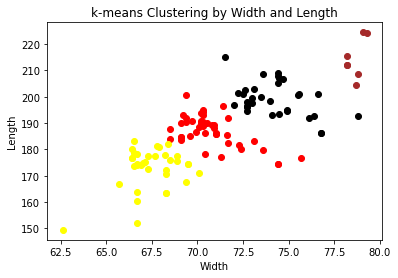

In [10]:
filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
filtered_label3 = df[labels == 3]
plt.scatter(filtered_label0['width'],filtered_label0['length'], color = 'red')
plt.scatter(filtered_label1['width'],filtered_label1['length'], color = 'black')
plt.scatter(filtered_label2['width'],filtered_label2['length'], color = 'yellow')
plt.scatter(filtered_label3['width'],filtered_label3['length'], color = 'brown')
plt.title('k-means Clustering by Width and Length') #title
plt.xlabel('Width') #x label
plt.ylabel('Length') #y label
plt.show()

<h3>I think between #2 and #4, Four cluster is better in addresses the objective of the clustering since this approach identifies and groups comparable data points in bigger datasets without regard for the specific outcome, four cluster maximizes the average profile over a wide range of conceivable values thus its superior in addressing the clustering goal.<h3/>

In [11]:
epsilon = 0.3
minimumSamples = 2
Y = df[['engine_s', 'resale']]
#Y has only two values, engine size and resale
Yz = pd.DataFrame(stats.zscore(Y), columns = ['engine_s', 'resale'])
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Yz)
labels_db = db.labels_
labels_db
df["labels_db"] = labels_db
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels,labels_db
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0,-1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,2,-1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1,0


In [12]:
n_clusters = len(set(labels_db))
n_noise = list(labels_db).count(-1)
print (n_clusters, n_noise)

5 17


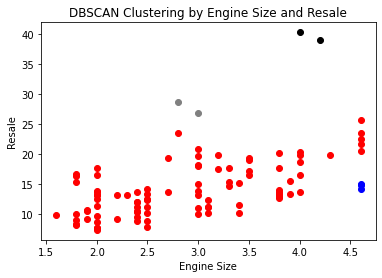

In [13]:
filtered_label0 = df[labels_db == 0]
filtered_label1 = df[labels_db == 1]
filtered_label2 = df[labels_db == 2]
filtered_label3 = df[labels_db == 3]
plt.scatter(filtered_label0['engine_s'],filtered_label0['resale'], color = 'red')
plt.scatter(filtered_label1['engine_s'],filtered_label1['resale'], color = 'black')
plt.scatter(filtered_label2['engine_s'],filtered_label2['resale'], color = 'grey')
plt.scatter(filtered_label3['engine_s'],filtered_label3['resale'], color = 'blue')
plt.title('DBSCAN Clustering by Engine Size and Resale')
plt.xlabel('Engine Size')
plt.ylabel('Resale')
plt.show()

<h3>There are 5 clusters and 17 outliers <h3/>
<h3> The visualization results in figure #7 and the visualization results in figure #1 are entirely different as the Kmeans method was employed in Figure 1, whereas DBSCAN was utilized in Figure 7.<h3/>

In [14]:
epsilon = 0.5
minimumSamples = 5
Y = df[['engine_s', 'resale']]
#Y has only two values, engine size and resale
Yz = pd.DataFrame(stats.zscore(Y), columns = ['engine_s', 'resale'])
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Yz)
labels_db = db.labels_
labels_db
df["labels_db"] = labels_db
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels,labels_db
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0,-1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,2,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1,0


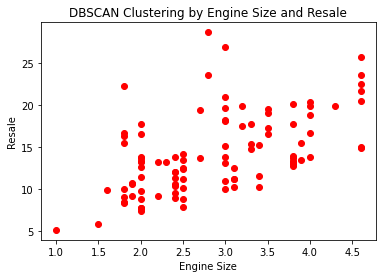

In [15]:
filtered_label0 = df[labels_db == 0]
filtered_label1 = df[labels_db == 1]
filtered_label2 = df[labels_db == 2]
filtered_label3 = df[labels_db == 3]
filtered_label4 = df[labels_db == 4]
plt.scatter(filtered_label0['engine_s'],filtered_label0['resale'], color = 'red')
plt.scatter(filtered_label1['engine_s'],filtered_label1['resale'], color = 'black')
plt.scatter(filtered_label2['engine_s'],filtered_label2['resale'], color = 'grey')
plt.scatter(filtered_label3['engine_s'],filtered_label3['resale'], color = 'blue')
plt.scatter(filtered_label4['engine_s'],filtered_label4['resale'], color = 'yellow')
plt.title('DBSCAN Clustering by Engine Size and Resale')
plt.xlabel('Engine Size')
plt.ylabel('Resale')
plt.show()

<h3> The visualization results in figure #7 and the visualization results in figure #9 are entirely different as we changed epsilon to 0.5 which made the figure produce broader clusters encompassing more data points. <h

In [16]:
epsilon = 0.3
minimumSamples = 2
Y = df[['width','length']]
#Y has only two values, engine size and resale
Yz = pd.DataFrame(stats.zscore(Y), columns = ['width','length'])
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Yz)
labels_db = db.labels_
labels_db
df["labels_db"] = labels_db
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,labels,labels_db
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,2,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1,2


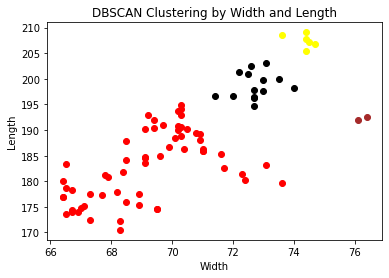

In [17]:
filtered_label0 = df[labels_db == 0]
filtered_label1 = df[labels_db == 1]
filtered_label2 = df[labels_db == 2]
filtered_label3 = df[labels_db == 3]
plt.scatter(filtered_label0['width'],filtered_label0['length'], color = 'red')
plt.scatter(filtered_label1['width'],filtered_label1['length'], color = 'black')
plt.scatter(filtered_label2['width'],filtered_label2['length'], color = 'brown')
plt.scatter(filtered_label3['width'],filtered_label3['length'], color = 'yellow')
plt.title('DBSCAN Clustering by Width and Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

<h3>The visualization results in figure #5 and the visualization results in figure #12 are entirely different. The Kmeans method was employed in Figure 5, whereas DBSCAN was utilized in Figure 12. Figure 12 which used DBSCAN is more clear and is a bit more simple and it has produced a varying number of clusters, based on the input data. <h3/>

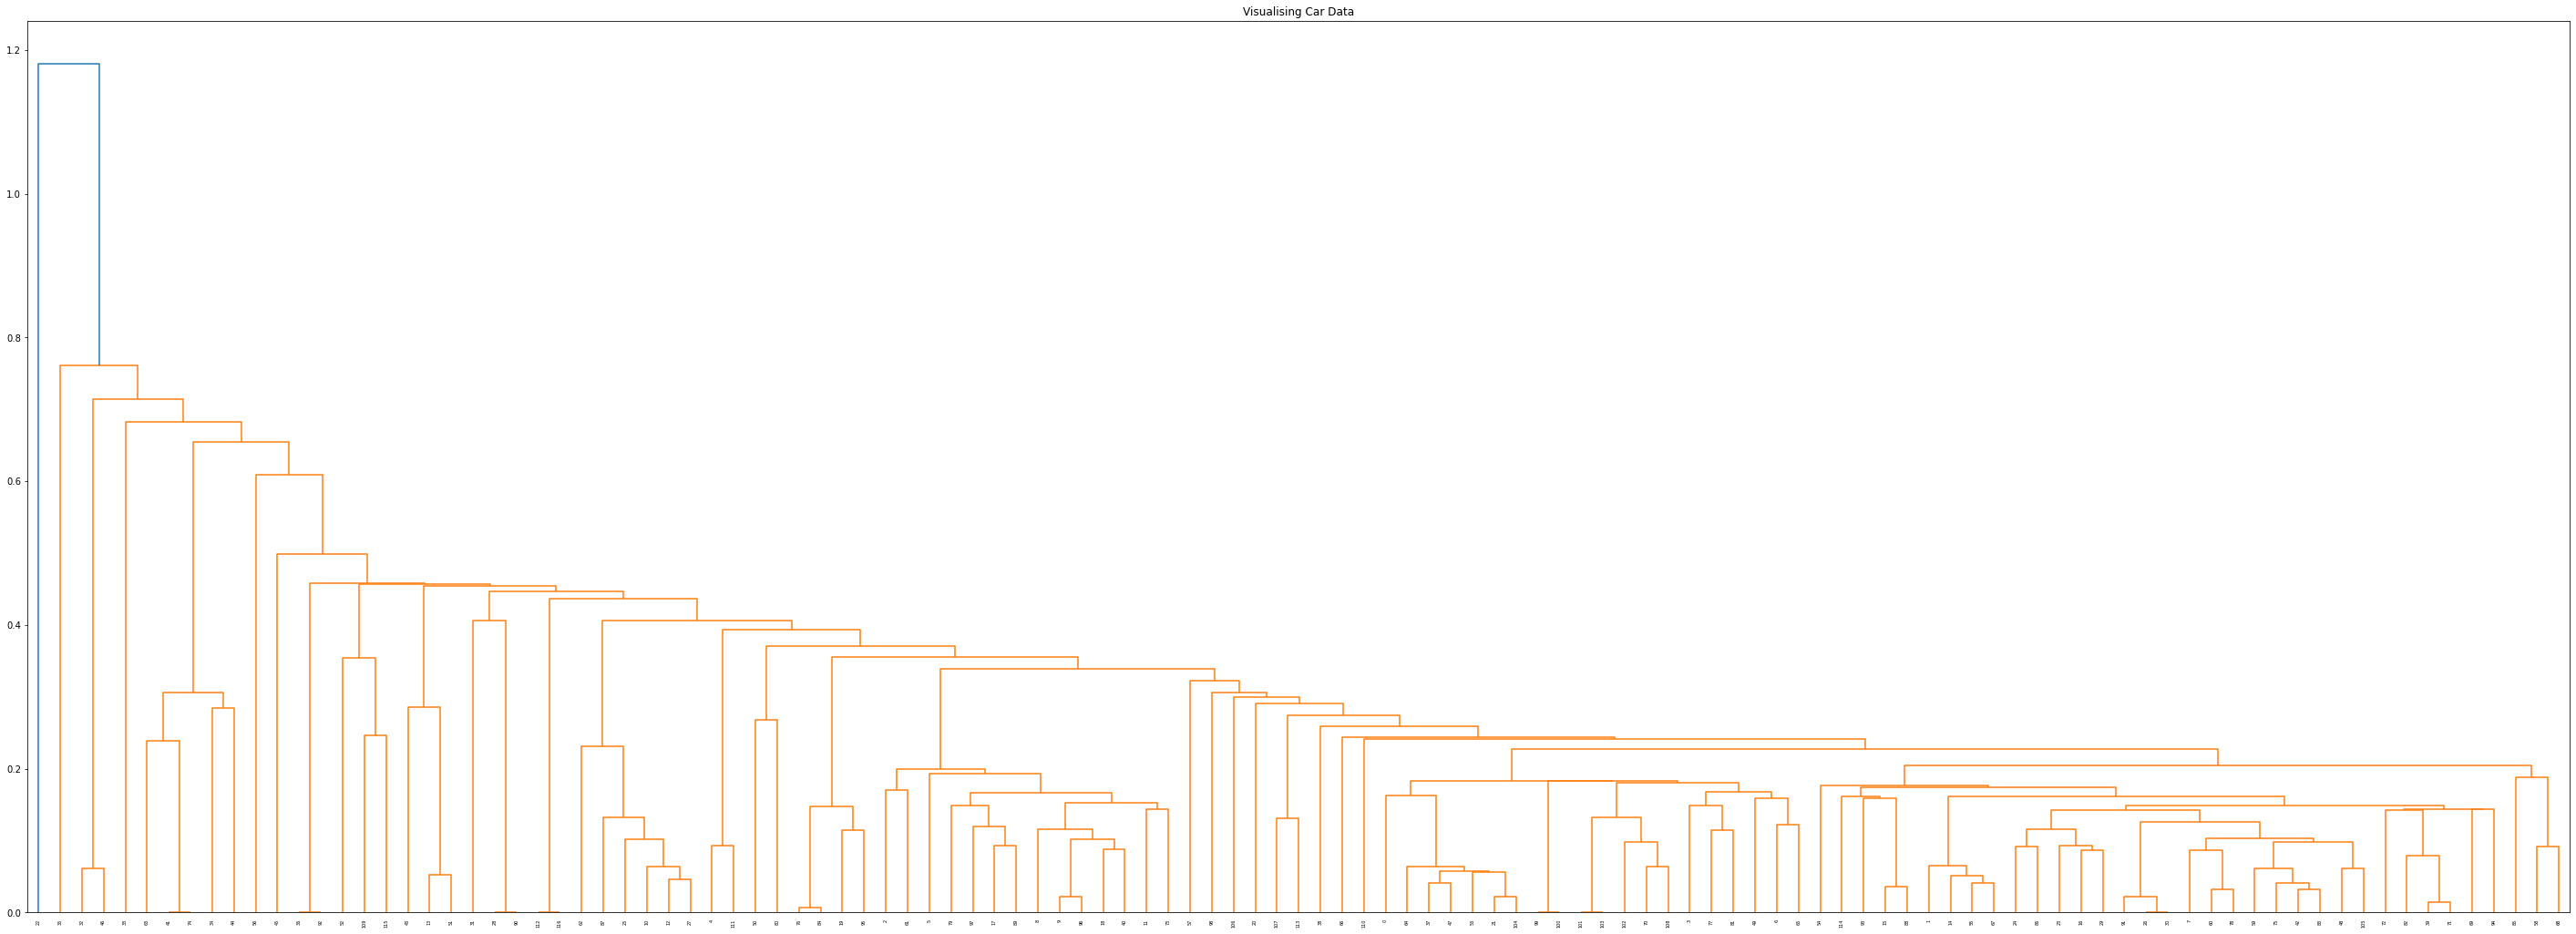

In [18]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(Yz)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['engine_s', 'resale']
plt.figure(figsize =(50, 18))
plt.title('Visualising Car Data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='single')))

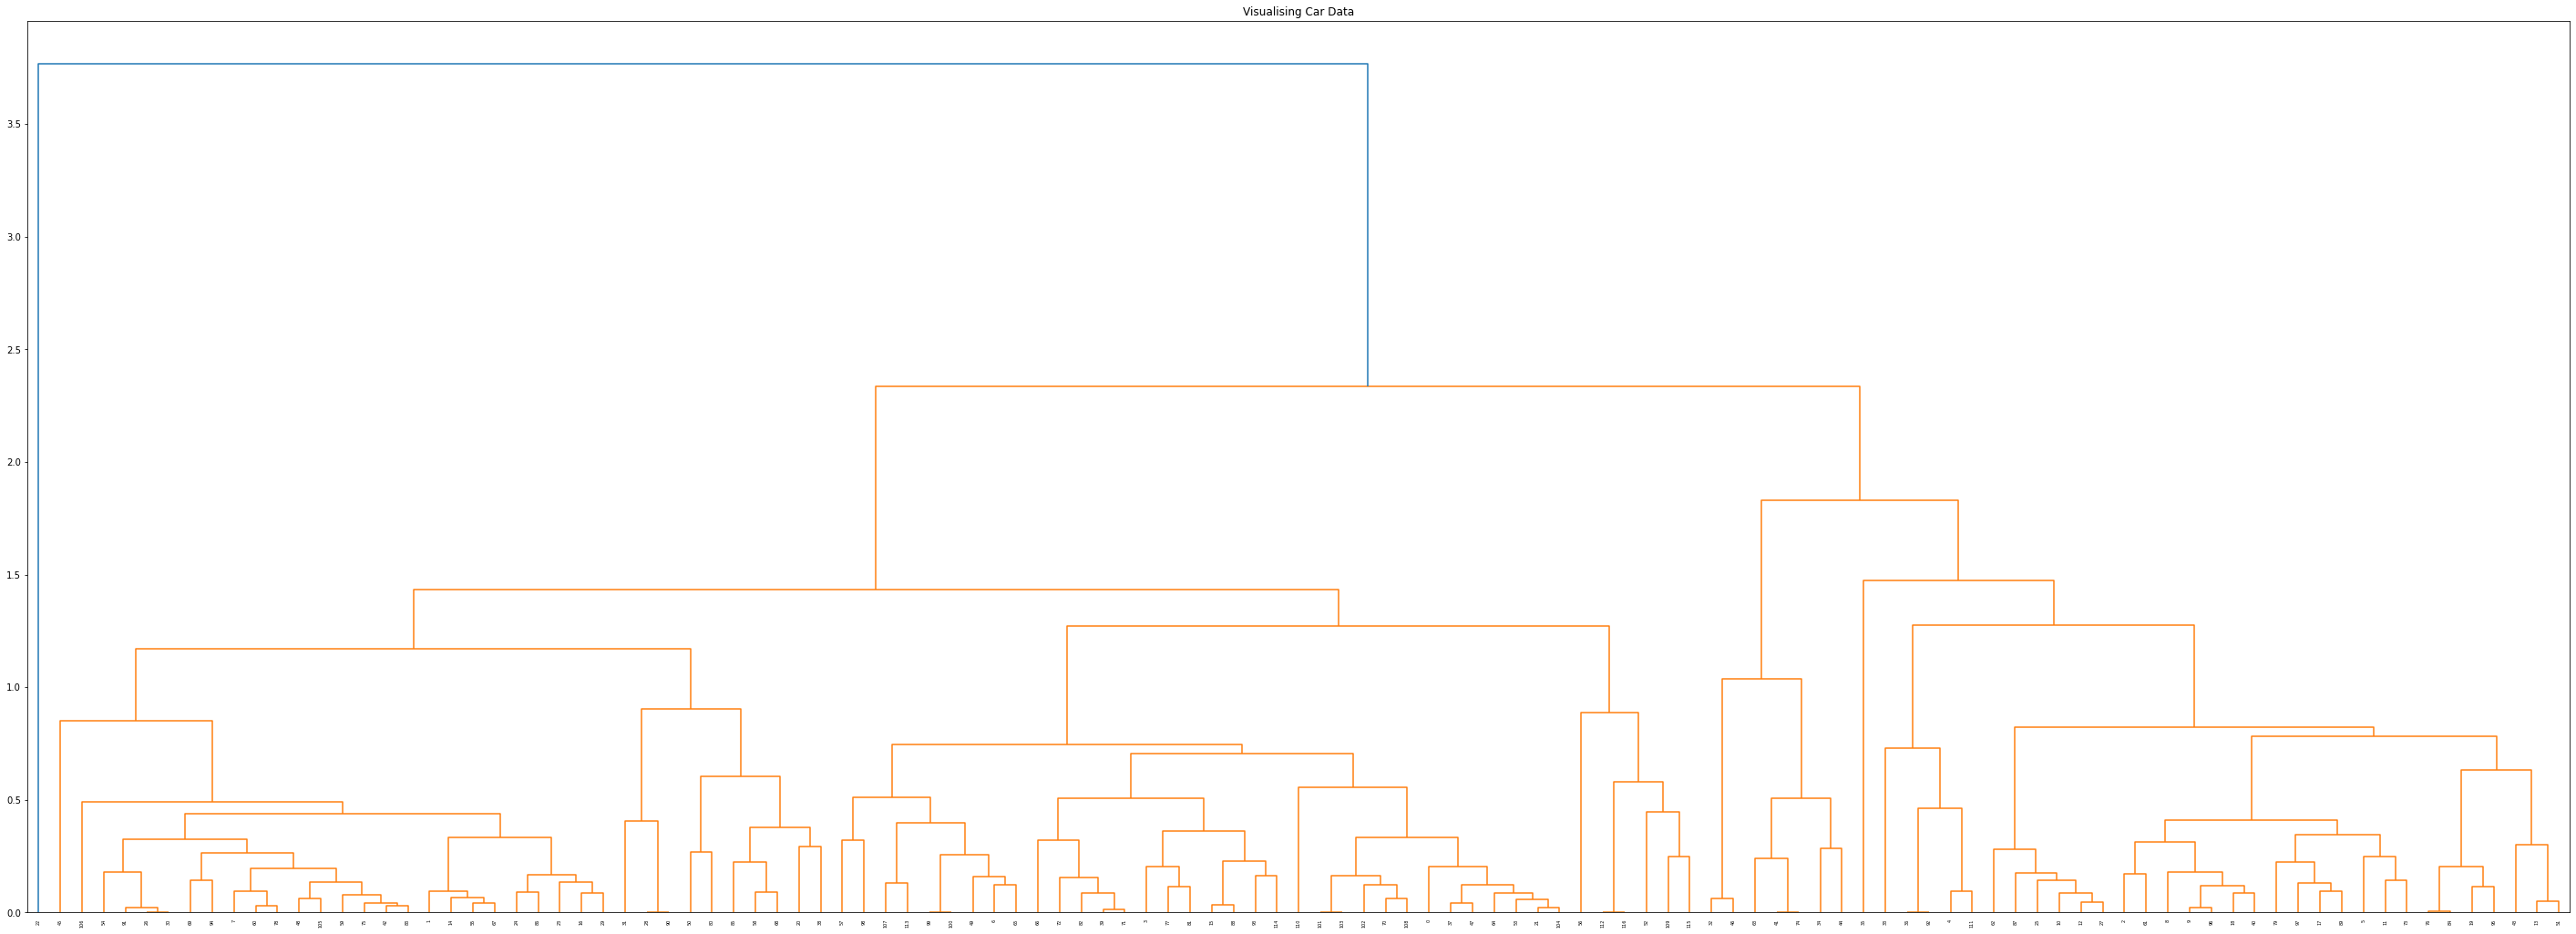

In [19]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(Yz)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['engine_s', 'resale']
plt.figure(figsize =(50, 18))
plt.title('Visualising Car Data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='average')))

<h3>We created the dendograms with method from single to average. Before merging, figure 14 which is an single dendrogram determines the lowest distance between clusters, whereas fan double dendrogram of figure 15 calculates the average distance between clusters.<h3/>

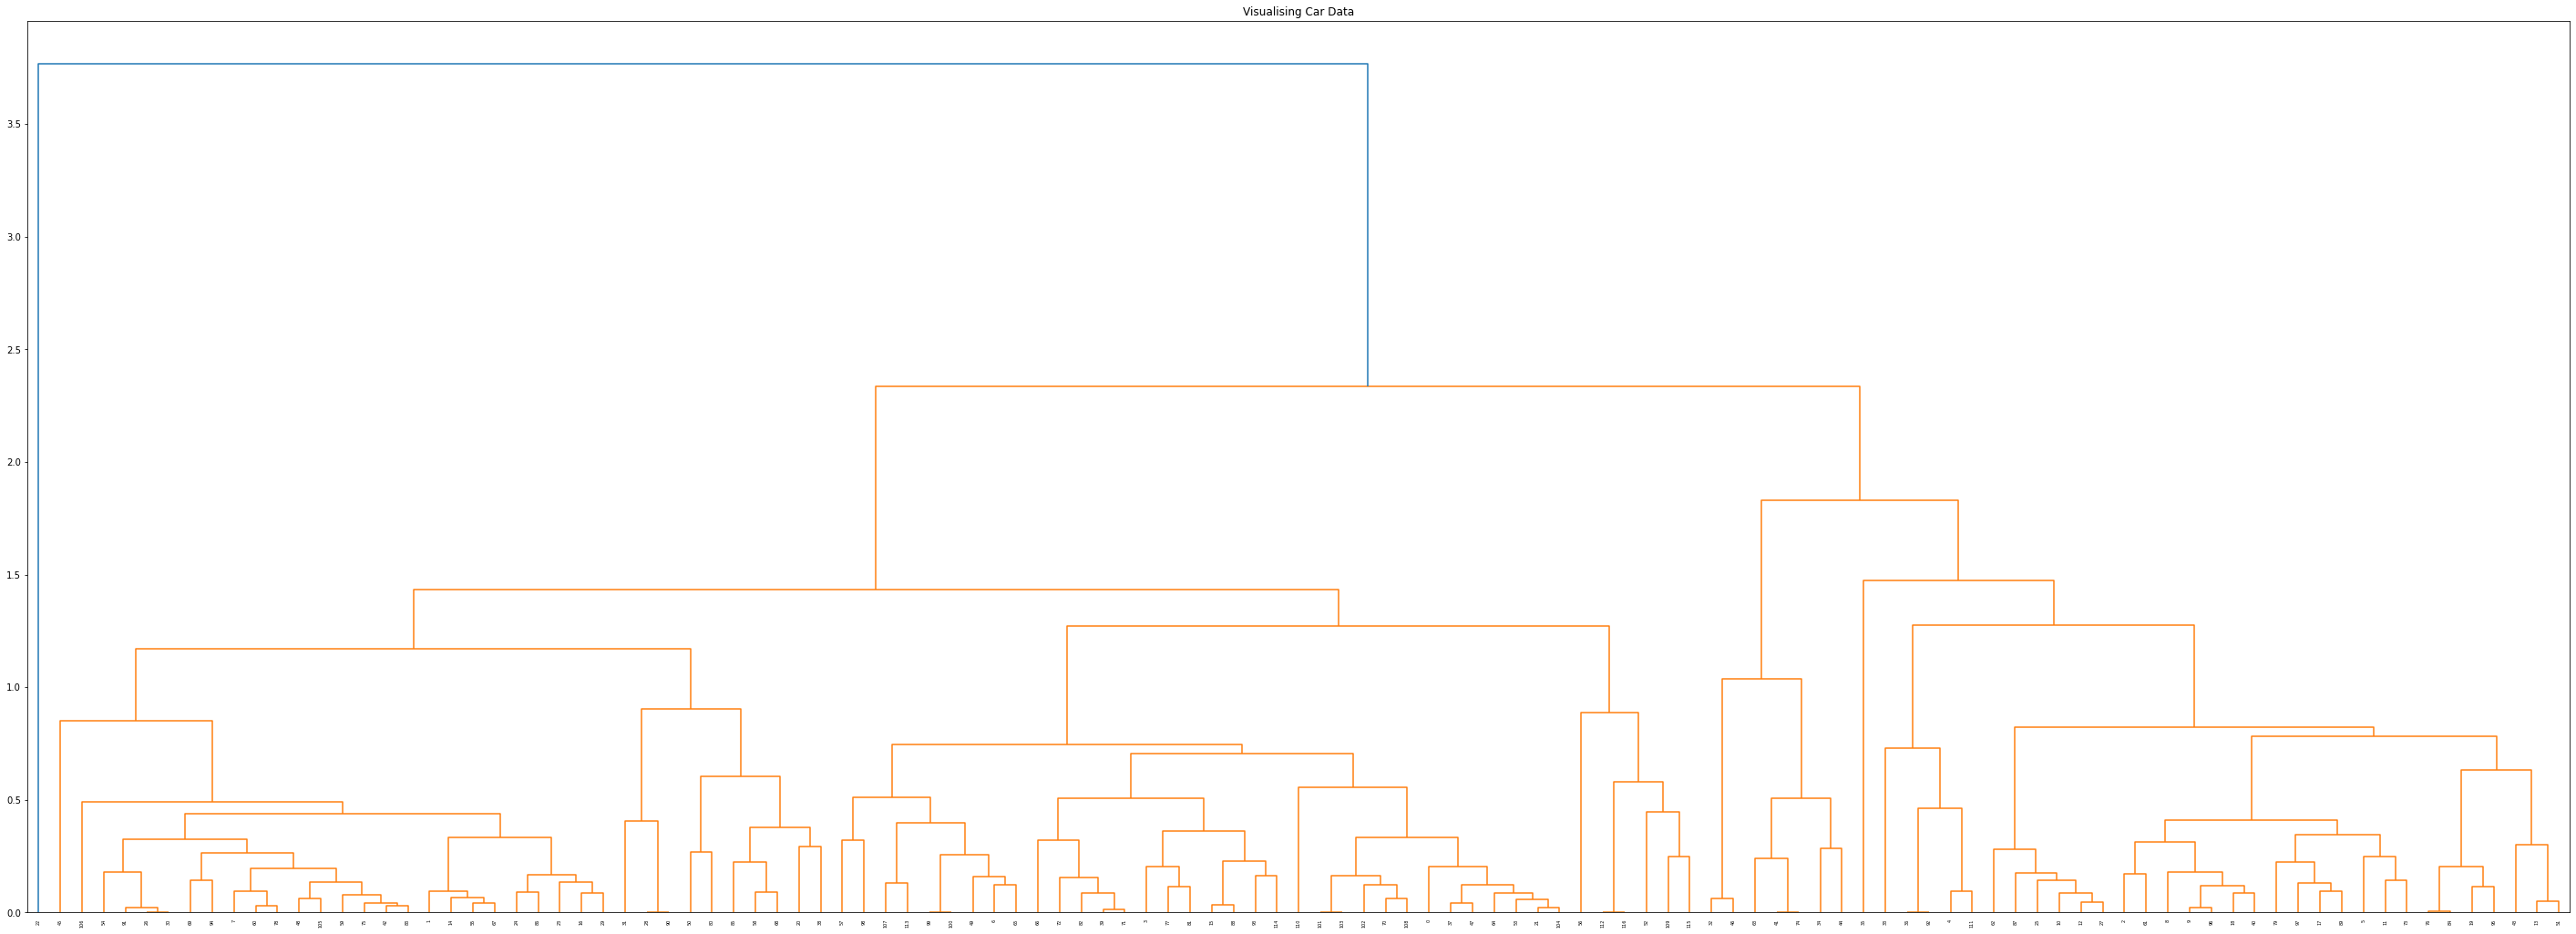

In [20]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(Yz)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['width', 'length']
plt.figure(figsize =(50, 18))
plt.title('Visualising Car Data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='average')))

<h3>After comparing dendograms figure 15 and 17, we can see both the dendograms are same.<h3/>